In [ ]:
!pip install wfdb
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3
!pip install neurokit2

In [ ]:
!wget -r -N -c -np https://physionet.org/files/chfdb/1.0.0/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted
import glob
from IPython.display import display
import wfdb
from wfdb import processing
import neurokit2 as nk

In [ ]:
# record_path = '/content/physionet.org/files/chfdb/1.0.0/RECORDS'
# ann = wfdb.rdann(record_path, 'atr')
# signals, fields = wfdb.rdsamp(record_path)
# # `symbol` is the label class, `sample` is the index for the signals array
# df = pd.DataFrame({'symbol': ann.symbol, 'aux': ann.aux_note, 'position': ann.sample})

# fs = fields['fs']
# print('ECG signal size:', signals.shape)
# print('ECG sampling rate:', fs, '[Hz]')
# print('Labels distribution:', df.symbol.value_counts())

In [ ]:
hea_paths = natsorted(glob.glob("/content/physionet.org/files/chfdb/1.0.0/*.hea"))
dat_paths = natsorted(glob.glob("/content/physionet.org/files/chfdb/1.0.0/*.dat"))
hea1_paths = natsorted(glob.glob("/content/physionet.org/files/chfdb/1.0.0/*.hea-"))
ecg_paths = natsorted(glob.glob("/content/physionet.org/files/chfdb/1.0.0/*.ecg"))


In [ ]:
dat_paths

['/content/physionet.org/files/chfdb/1.0.0/chf01.dat',
 '/content/physionet.org/files/chfdb/1.0.0/chf02.dat',
 '/content/physionet.org/files/chfdb/1.0.0/chf03.dat',
 '/content/physionet.org/files/chfdb/1.0.0/chf04.dat',
 '/content/physionet.org/files/chfdb/1.0.0/chf05.dat',
 '/content/physionet.org/files/chfdb/1.0.0/chf06.dat',
 '/content/physionet.org/files/chfdb/1.0.0/chf07.dat',
 '/content/physionet.org/files/chfdb/1.0.0/chf08.dat',
 '/content/physionet.org/files/chfdb/1.0.0/chf09.dat',
 '/content/physionet.org/files/chfdb/1.0.0/chf10.dat',
 '/content/physionet.org/files/chfdb/1.0.0/chf11.dat',
 '/content/physionet.org/files/chfdb/1.0.0/chf12.dat',
 '/content/physionet.org/files/chfdb/1.0.0/chf13.dat',
 '/content/physionet.org/files/chfdb/1.0.0/chf14.dat',
 '/content/physionet.org/files/chfdb/1.0.0/chf15.dat']

In [ ]:
ecg_paths

['/content/physionet.org/files/chfdb/1.0.0/chf01.ecg',
 '/content/physionet.org/files/chfdb/1.0.0/chf02.ecg',
 '/content/physionet.org/files/chfdb/1.0.0/chf03.ecg',
 '/content/physionet.org/files/chfdb/1.0.0/chf04.ecg',
 '/content/physionet.org/files/chfdb/1.0.0/chf05.ecg',
 '/content/physionet.org/files/chfdb/1.0.0/chf06.ecg',
 '/content/physionet.org/files/chfdb/1.0.0/chf07.ecg',
 '/content/physionet.org/files/chfdb/1.0.0/chf08.ecg',
 '/content/physionet.org/files/chfdb/1.0.0/chf09.ecg',
 '/content/physionet.org/files/chfdb/1.0.0/chf10.ecg',
 '/content/physionet.org/files/chfdb/1.0.0/chf11.ecg',
 '/content/physionet.org/files/chfdb/1.0.0/chf12.ecg',
 '/content/physionet.org/files/chfdb/1.0.0/chf13.ecg',
 '/content/physionet.org/files/chfdb/1.0.0/chf14.ecg',
 '/content/physionet.org/files/chfdb/1.0.0/chf15.ecg']

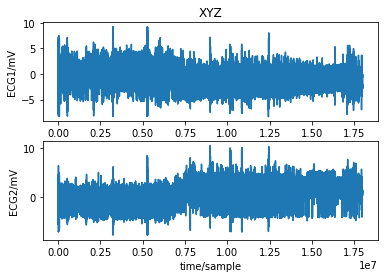

{'adc_gain': [200.0, 200.0],
 'adc_res': [12, 12],
 'adc_zero': [0, -70],
 'base_counter': None,
 'base_date': None,
 'base_time': datetime.time(9, 10),
 'baseline': [0, -70],
 'block_size': [0, 0],
 'byte_offset': [None, None],
 'checksum': [-29476, 31138],
 'comments': ['Age: 53  Sex: M  NYHA class: III-IV'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['chf15.dat', 'chf15.dat'],
 'fmt': ['212', '212'],
 'fs': 250,
 'init_value': [-128, -141],
 'n_sig': 2,
 'p_signal': array([[-0.64 , -0.355],
        [-1.025, -0.345],
        [-0.975, -0.31 ],
        ...,
        [-0.565,  1.025],
        [-0.575,  1.025],
        [-0.595,  1.04 ]]),
 'record_name': 'chf15',
 'samps_per_frame': [1, 1],
 'sig_len': 17993443,
 'sig_name': ['ECG1', 'ECG2'],
 'skew': [None, None],
 'units': ['mV', 'mV']}

In [ ]:
patient_id = 15
ecg_record = wfdb.rdrecord(ecg_paths[patient_id-1][:-4])
wfdb.plot_wfdb(record=ecg_record, title='XYZ')
display(ecg_record.__dict__)
# ecg_record


In [ ]:
#dat_record = wfdb.rdsamp(dat_paths[1][:-4])
#display(dat_record)
patient_id = 14 
ecg_record = wfdb.rdsamp(ecg_paths[patient_id-1][:-4],sampfrom=100,sampto=1500)
display(ecg_record)
#samples,fields = wfdb.rdsamp(dat_paths[14][:-4],sampfrom=100,sampto=10000)
#display(fields)
#display(samples)

(array([[-0.125,  0.74 ],
        [-0.115,  0.725],
        [-0.135,  0.655],
        ...,
        [-0.54 ,  0.755],
        [-0.55 ,  0.8  ],
        [-0.53 ,  0.8  ]]),
 {'base_date': None,
  'base_time': datetime.time(8, 14, 0, 400000),
  'comments': ['Age: 61  Sex: M  NYHA class: III-IV'],
  'fs': 250,
  'n_sig': 2,
  'sig_len': 1400,
  'sig_name': ['ECG1', 'ECG2'],
  'units': ['mV', 'mV']})

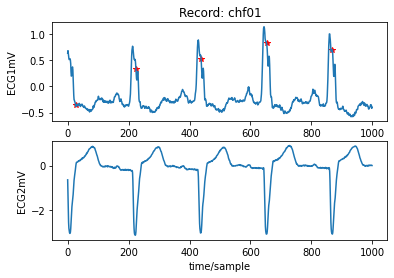

{'adc_gain': [200.0, 200.0],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': datetime.time(10, 0),
 'baseline': [0, 0],
 'block_size': [0, 0],
 'byte_offset': [None, None],
 'checksum': [21435, 49200],
 'comments': ['Age: 71  Sex: M  NYHA class: III-IV'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['chf01.dat', 'chf01.dat'],
 'fmt': ['212', '212'],
 'fs': 250,
 'init_value': [127, -128],
 'n_sig': 2,
 'p_signal': array([[ 0.635, -0.64 ],
        [ 0.68 , -1.28 ],
        [ 0.63 , -1.92 ],
        ...,
        [-0.37 ,  0.005],
        [-0.42 ,  0.   ],
        [-0.4  ,  0.   ]]),
 'record_name': 'chf01',
 'samps_per_frame': [1, 1],
 'sig_len': 1000,
 'sig_name': ['ECG1', 'ECG2'],
 'skew': [None, None],
 'units': ['mV', 'mV']}

In [ ]:
record = wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf01',sampfrom=0,sampto=1000)
ann = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf01', 'ecg',sampfrom=0,sampto=1000)
wfdb.plot_wfdb(record, ann)
display(record.__dict__)

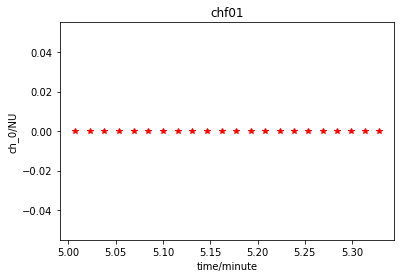

In [ ]:
annotation = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf01','ecg', sampfrom=75000, sampto=80000)
annotation.fs = 250
wfdb.plot_wfdb(annotation=annotation, time_units='minutes')

/usr/local/lib/python3.7/dist-packages/neurokit2/signal/signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)


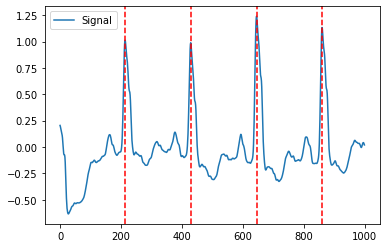

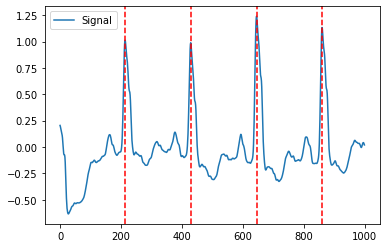

In [ ]:
data_1=record.p_signal
data2=data_1[:,[0]]
data2=data2.flatten()
# Extract R-peaks locations
signals, info = nk.ecg_process(data2, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data2, sampling_rate=250)

rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks,cleaned_ecg)

# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks[:5], cleaned_ecg[:2000])

In [ ]:
#fs = 128
#new_sig, new_ann = wfdb.processing.resample_multichan(record.p_signal, ann, record.fs, fs_target = fs)
#record.fs = fs # Update record's fs
#print("New frequency sample: " + str(record.fs))
#plt.plot(new_sig)
#print("New signal length: " + str(len(new_sig))) 

In [ ]:
# Z-normalise
#avg = new_sig.mean() # Count Mean once
#sd = new_sig.std() # Count SD once
#print("The average is " + str(avg) + "and the std is " + str(sd))
#new_sig = (new_sig - avg)/(sd)
#plt.plot(new_sig);

In [ ]:
# Update with pre-processed signal
#record.p_signal = new_sig
#record.sig_len = len(new_sig)
#wfdb.plot_wfdb(record, new_ann)
#display(record.__dict__)

3
[204 420 635]


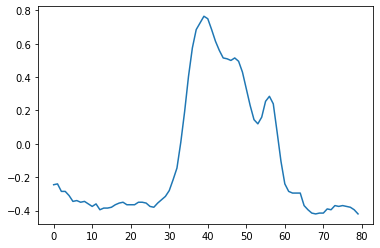

In [ ]:
# qrs = wfdb.processing.XQRS(record.p_signal[0], record.fs)
new_sig=record.p_signal
new_sig=new_sig[:,[0]]
peak_indices = wfdb.processing.gqrs_detect(new_sig, record.fs)
# wfdb.processing.compute_hr(record.sig_len, peak_indices, record.fs)
print(len(peak_indices))
print(peak_indices)
#print(peak_indices[0], peak_indices[1])
#plt.plot(new_sig);
#plt.plot(new_sig[(peak_indices[0]):(peak_indices[1])]);
#print(new_sig)
#display(record.__dict__)
i=peak_indices[0]
j=peak_indices[1]
mid_point=(i+j)//2
#plt.plot(new_sig[(0+i)//2:mid_point])
#other method to extract the beats
plt.plot(new_sig[(peak_indices[0]-30):(peak_indices[0]+50)]); # 30 samples before, 50 samples after


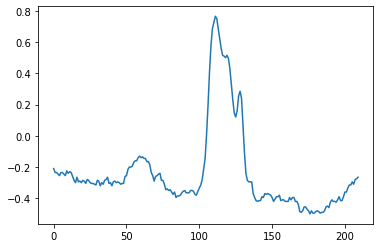

In [ ]:

i=peak_indices[0]
j=peak_indices[1]
mid_point=(i+j)//2
plt.plot(new_sig[(0+i)//2:mid_point])

In [ ]:
#wfdb.io.show_ann_labels()
#wfdb.io.show_ann_classes()
#annotation = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf03','ecg', sampfrom=100000, sampto=110000)
#annotation.fs = 250
#wfdb.plot_wfdb(annotation=annotation, time_units='minutes')
#record = wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf03', sampto = 1500)
#annotation = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf03', 'ecg', sampto = 1500)
#wfdb.plot_wfdb(record=record, annotation=annotation,
              # title='Record chf03 from BIDMC-CHF Dataset',
               #time_units='seconds')

In [ ]:
#patient_id = 14 
#ecg_record = wfdb.rdrecord(ecg_paths[patient_id-1][:-4],sampfrom=100,sampto=500)
#wfdb.plot_wfdb(record=ecg_record, title='Patient14')
#plt.plot(ecg_record.p_signal)
#print("sig_len:" + str(len(ecg_record.p_signal)))

In [ ]:
#ecg = nk.ecg_simulate(duration=10, sampling_rate=250)
#cleaned = nk.ecg_clean(ecg, sampling_rate=250)
#_, rpeaks = nk.ecg_peaks(cleaned, sampling_rate=250)
#signals, waves = nk.ecg_delineate(cleaned, rpeaks, sampling_rate=250)
#nk.events_plot(waves["ECG_P_Peaks"], cleaned) 
#nk.events_plot(waves["ECG_T_Peaks"], cleaned)

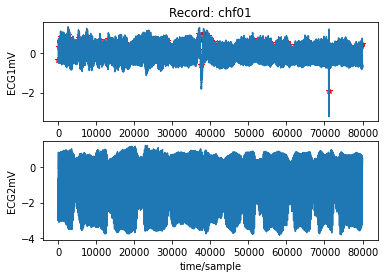

{'adc_gain': [200.0, 200.0],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': datetime.time(10, 0),
 'baseline': [0, 0],
 'block_size': [0, 0],
 'byte_offset': [None, None],
 'checksum': [21435, 49200],
 'comments': ['Age: 71  Sex: M  NYHA class: III-IV'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['chf01.dat', 'chf01.dat'],
 'fmt': ['212', '212'],
 'fs': 250,
 'init_value': [127, -128],
 'n_sig': 2,
 'p_signal': array([[ 0.635, -0.64 ],
        [ 0.68 , -1.28 ],
        [ 0.63 , -1.92 ],
        ...,
        [-0.37 ,  0.005],
        [-0.42 ,  0.   ],
        [-0.4  ,  0.   ]]),
 'record_name': 'chf01',
 'samps_per_frame': [1, 1],
 'sig_len': 1000,
 'sig_name': ['ECG1', 'ECG2'],
 'skew': [None, None],
 'units': ['mV', 'mV']}

In [ ]:
record1 = wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf01',sampfrom=0,sampto=80000)
ann1 = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf01', 'ecg',sampfrom=0,sampto=80000)
wfdb.plot_wfdb(record1, ann1)
display(record.__dict__)

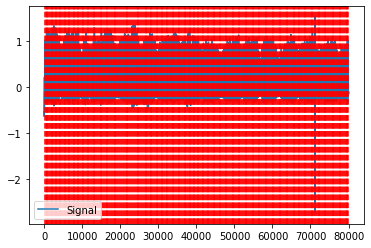

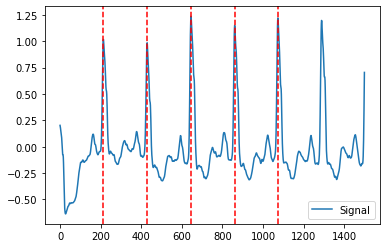

In [ ]:
# Retrieve ECG data from data folder (sampling rate= 250 Hz)
#patient_id = 14 
#ecg_record = wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf01')
#data=ecg_record.p_signal
#ecg_signal = nk.data(dataset=data2)["ecg"]
data_1=record1.p_signal
data2=data_1[:,[0]]
data2=data2.flatten()
# Extract R-peaks locations
signals, info = nk.ecg_process(data2, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data2, sampling_rate=250)

rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks,cleaned_ecg)

# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks[:5], cleaned_ecg[:1500])

In [ ]:
data2=record1.p_signal
data=data2[:,[0]]
data=data.flatten()
data.shape

print(data)

[ 0.635  0.68   0.63  ... -0.7   -0.685 -0.72 ]


In [ ]:
print(cleaned_ecg[0])
print(data[0])

0.2021456753233577
0.635


In [ ]:
data.shape

(80000,)

In [ ]:
# Automatically process the (raw) ECG signal
signals, info = nk.ecg_process(data, sampling_rate=250)
print(signals)

       ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  ECG_P_Peaks  \
0        0.635   0.202146  66.429136     0.428552            0            0   
1        0.680   0.192709  66.429136     0.428552            0            0   
2        0.630   0.178872  66.429136     0.428552            0            0   
3        0.570   0.163433  66.429136     0.428552            0            0   
4        0.535   0.148994  66.429136     0.428552            0            0   
...        ...        ...        ...          ...          ...          ...   
79995   -0.705  -0.107438  67.873303     0.875882            0            0   
79996   -0.695  -0.101899  67.873303     0.875882            0            0   
79997   -0.700  -0.099039  67.873303     0.875882            0            0   
79998   -0.685  -0.097486  67.873303     0.875882            0            0   
79999   -0.720  -0.098080  67.873303     0.875882            0            0   

       ECG_P_Onsets  ECG_P_Offsets  ECG_Q_Peaks  EC

[  213   429   645   860  1073  1288  1503  1719  1935  2151  2366  2582
  2796  3009  3221  3433  3646  3858  4071  4284  4495  4709  4923  5138
  5351  5564  5778  5992  6207  6417  6632  6847  7062  7276  7493  7710
  7927  8146  8361  8578  8793  9005  9222  9442  9657  9874 10094 10315
 10535 10755 10975 11195 11416 11637 11857 12081 12304 12531 12757 12981
 13201 13427 13657 13889 14121 14349 14580 14813 15040 15269 15499 15729
 15958 16185 16414 16643 16873 17104 17333 17559 17790 18022 18256 18493
 18728 18968 19208 19449 19692 19935 20180 20424 20668 20911 21154 21398
 21642 21886 22129 22374 22618 22863 23105 23347 23589 23831 24071 24307
 24549 24787 25029 25267 25501 25739 25971 26204 26433 26655 26882 27103
 27324 27540 27754 27974 28194 28410 28633 28857 29076 29301 29526 29745
 29965 30185 30402 30623 30844 31062 31283 31505 31726 31948 32171 32395
 32616 32842 33066 33291 33515 33741 33968 34195 34418 34646 34874 35102
 35328 35555 35783 36011 36237 36462 36686 36910 37

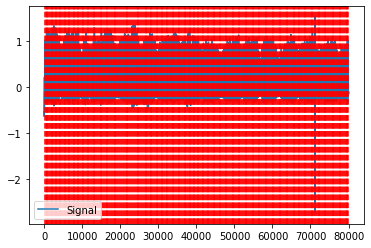

In [ ]:
# Extract clean ECG and R-peaks location
cleaned_ecg1 = signals["ECG_Clean"]
rpeaks1 = info["ECG_R_Peaks"]
# Visualize R-peaks in ECG signal
print(rpeaks1)
plot = nk.events_plot(rpeaks1, cleaned_ecg1)

In [ ]:
print(cleaned_ecg1)
cleaned_ecg1.shape
print("signal length: " + str(len(cleaned_ecg1))) 
print(cleaned_ecg1[2])

0        0.202146
1        0.192709
2        0.178872
3        0.163433
4        0.148994
           ...   
79995   -0.107438
79996   -0.101899
79997   -0.099039
79998   -0.097486
79999   -0.098080
Name: ECG_Clean, Length: 80000, dtype: float64
signal length: 80000
0.17887150653754955


106   -0.149069
107   -0.145852
108   -0.141863
109   -0.137704
110   -0.132773
         ...   
316    0.053231
317    0.057045
318    0.057453
319    0.055856
320    0.051255
Name: ECG_Clean, Length: 215, dtype: float64
321    0.044848
322    0.035437
323    0.027222
324    0.020802
325    0.018778
         ...   
532   -0.088942
533   -0.087521
534   -0.087494
535   -0.086261
536   -0.084423
Name: ECG_Clean, Length: 216, dtype: float64
537   -0.083780
538   -0.084731
539   -0.086277
540   -0.090218
541   -0.095753
         ...   
747   -0.025202
748   -0.017261
749   -0.011321
750   -0.007982
751   -0.007244
Name: ECG_Clean, Length: 215, dtype: float64


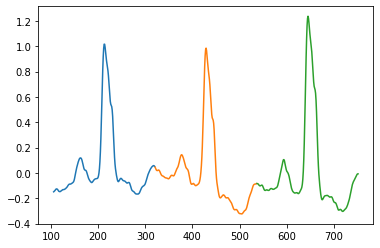

In [ ]:
i=rpeaks1[0]
j=rpeaks1[1]
mid_point=(i+j)//2
plt.plot(cleaned_ecg1[(0+i)//2:mid_point])
print(cleaned_ecg1[(0+i)//2:mid_point])

i=rpeaks1[1]
j=rpeaks1[2]
mid_point1=(i+j)//2
plt.plot(cleaned_ecg1[mid_point:mid_point1])
print(cleaned_ecg1[mid_point:mid_point1])

i=rpeaks1[2]
j=rpeaks1[3]
mid_point2=(i+j)//2
plt.plot(cleaned_ecg1[mid_point1:mid_point2])
print(cleaned_ecg1[mid_point1:mid_point2])

Streaming output truncated to the last 5000 lines.
 -0.22775755 -0.22579819 -0.22204037 -0.21428405 -0.20552918 -0.19517573
 -0.18442365 -0.17327291 -0.16292346 -0.15157527 -0.13882828 -0.12428247
 -0.10793778 -0.09139418 -0.07605162 -0.06371007 -0.05376949 -0.04722982
 -0.04229104 -0.0377531  -0.03261595 -0.02807956 -0.02414388 -0.02080888
 -0.01947451 -0.02054073 -0.0222075  -0.02307477 -0.02434251 -0.02421068]
[-0.02227923 -0.02074812 -0.02121732 -0.02408677 -0.02975644 -0.03822629
 -0.04709627 -0.05476635 -0.05883649 -0.06110663 -0.05997675 -0.0588468
 -0.05891675 -0.06198654 -0.06545614 -0.07192552 -0.07779462 -0.08146341
 -0.08233185 -0.0819999  -0.08006752 -0.07753467 -0.07720131 -0.0782674
 -0.08013291 -0.08099778 -0.08106199 -0.07852549 -0.07498825 -0.07045022
 -0.06731138 -0.06557167 -0.06523107 -0.06548953 -0.06654702 -0.0666035
 -0.06665893 -0.06751328 -0.0679665  -0.06921856 -0.07106943 -0.07251907
 -0.07196744 -0.07101451 -0.06706024 -0.06110459 -0.05294753 -0.04298903
 -

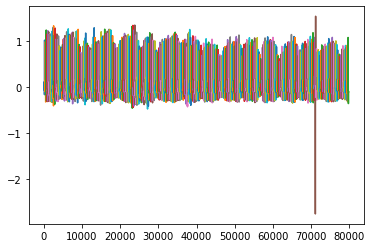

In [ ]:
length=len(rpeaks1)
print(length)
#m,n,p=None
result=[]
for i in range(length-1):
  if(i==0):
    i=rpeaks1[0]
    j=rpeaks1[1]
    mid_point=(i+j)//2
    plt.plot(cleaned_ecg1[(0+i)//2:mid_point])
    print(cleaned_ecg1[(0+i)//2:mid_point].values)
    result.append(cleaned_ecg1[(0+i)//2:mid_point].values)
  else:
    m=rpeaks1[i-1]
    n=rpeaks1[i]
    p=rpeaks1[i+1]
    mid_point=(m+n)//2
    mid_point1=(n+p)//2
    plt.plot(cleaned_ecg1[mid_point:mid_point1])
    print(cleaned_ecg1[mid_point:mid_point1].values)
    result.append(cleaned_ecg1[mid_point:mid_point1].values)

In [ ]:
type(cleaned_ecg)
cleaned_ecg.values

array([ 0.20214568,  0.19270882,  0.17887151, ..., -0.09903896,
       -0.09748574, -0.09807997])

In [ ]:
np.array(result).shape
#print(result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(353,)

Dataset of Patient 01

In [ ]:
data_chf1=pd.DataFrame(result)
data_chf1.to_csv('data_chf01.csv')

Dataset of Patient using rpeaks at the middle of the array , in this method the length of different beat will be same with rpeaks at the midddle of the array. for example if the length is 200 units then rpeaks will be at position:100 for each beats . Hereafter only this method for further extraction.

Dataset of Patient 01

In [ ]:
record01 = wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf01',sampfrom=0,sampto=90000)
ann1 = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf01', 'ecg',sampfrom=0,sampto=90000)

data_all=record01.p_signal
data_all=data_all[:,[0]]
data_final=data_all.flatten()

# Extract R-peaks locations
signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_01(k):
  patient_01=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_01[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_01[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_01[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_01

In [ ]:
patient_01_ecg=[]
for k in range(1,length-1):
  patient_01_ecg.append(get_ecg_01(k))

In [ ]:
data_01=pd.DataFrame(patient_01_ecg)
data_01.to_csv('data_chf01.csv')
data_01.shape

(397, 200)

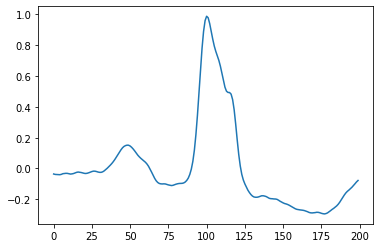

In [ ]:
plt.plot(patient_01_ecg[63])

dataset for patient 02

In [ ]:
record2 = wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf02',sampfrom=0,sampto=90000)
ann2 = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf02', 'ecg',sampfrom=0,sampto=90000)
data_all=record2.p_signal
data_all=data_all[:,[0]]
data_final=data_all.flatten()
# Extract R-peaks locations
signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_02(k):
  patient_02=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_02[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_02[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_02[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_02

In [ ]:
patient_02_ecg=[]
for k in range(2,length-2):
  patient_02_ecg.append(get_ecg_02(k))

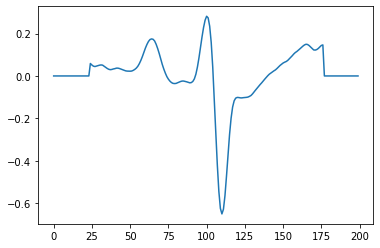

In [ ]:
plt.plot(patient_02_ecg[63])

In [ ]:
data_chf2=pd.DataFrame(patient_02_ecg)
data_chf2.to_csv('data_chf02.csv')
data_chf2.shape

(579, 200)

Dataset of Patient 03

In [ ]:
recoed3 = wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf03',sampfrom=0,sampto=90000)
ann3 = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf03', 'ecg',sampfrom=0,sampto=90000)
data_all=recoed3.p_signal
data_all=data_all[:,[0]]
data_final=data_all.flatten()
# Extract R-peaks locations
signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]
length=len(rpeaks_final)
def get_ecg_03(k):
  patient_03=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_03[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_03[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_03[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_03

In [ ]:
patient_03_ecg=[]
for k in range(2,length-2):
  patient_03_ecg.append(get_ecg_03(k))

In [ ]:
data_chf3=pd.DataFrame(patient_03_ecg)
data_chf3.to_csv('data_chf03.csv')
data_chf3.shape

(355, 200)

Daatset of Patient 04

In [ ]:
record4 = wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf04',sampfrom=0,sampto=90000)
ann4 = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf04', 'ecg',sampfrom=0,sampto=90000)
data_all=record4.p_signal
data_all=data_all[:,[0]]
data_final=data_all.flatten()
# Extract R-peaks locations
signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_04(k):
  patient_04=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_04[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_04[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_04[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_04

In [ ]:
patient_04_ecg=[]
for k in range(2,length-2):
  patient_04_ecg.append(get_ecg_04(k))

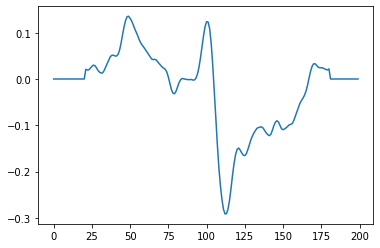

In [ ]:
plt.plot(patient_04_ecg[263])

In [ ]:
data_chf4=pd.DataFrame(patient_04_ecg)
data_chf4.to_csv('data_chf04.csv')
data_chf4.shape

(568, 200)

Dataset of Patient 05

In [ ]:
record5= wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf05',sampfrom=0,sampto=90000)
ann5 = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf05', 'ecg',sampfrom=0,sampto=90000)
data_all=record5.p_signal
data_all=data_all[:,[0]]
data_final=data_all.flatten()
# Extract R-peaks locations
signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]


In [ ]:
length=len(rpeaks_final)
def get_ecg_05(k):
  patient_05=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_05[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_05[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_05[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_05

In [ ]:
patient_05_ecg=[]
for k in range(1,length-1):
  patient_05_ecg.append(get_ecg_05(k))

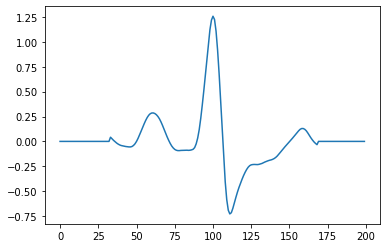

In [ ]:
plt.plot(patient_05_ecg[263])

In [ ]:
data_chf5=pd.DataFrame(patient_05_ecg)
data_chf5.to_csv('data_chf05.csv')
data_chf5.shape

(653, 200)

Dataset of Patient 06

In [ ]:
record6= wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf06',sampfrom=0,sampto=90000)
ann5 = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf06', 'ecg',sampfrom=0,sampto=90000)
data_all=record6.p_signal
data_all=data_all[:,[0]]
data_final=data_all.flatten()
# Extract R-peaks locations
signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_06(k):
  patient_06=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_06[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_06[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_06[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_06

In [ ]:
patient_06_ecg=[]
for k in range(1,length-1):
  patient_06_ecg.append(get_ecg_06(k))

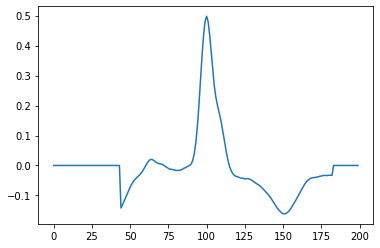

In [ ]:
plt.plot(patient_06_ecg[263])

In [ ]:
data_chf6=pd.DataFrame(patient_06_ecg)
data_chf6.to_csv('data_chf06.csv')
data_chf6.shape

(623, 200)

Dataset of patient 07

In [ ]:
record7= wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf07',sampfrom=0,sampto=90000)
ann5 = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf07', 'ecg',sampfrom=0,sampto=90000)
data_all=record7.p_signal
data_all=data_all[:,[0]]
data_final=data_all.flatten()
# Extract R-peaks locations
signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_07(k):
  patient_07=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_07[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_07[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_07[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_07

In [ ]:
patient_07_ecg=[]
for k in range(1,length-1):
  patient_07_ecg.append(get_ecg_07(k))

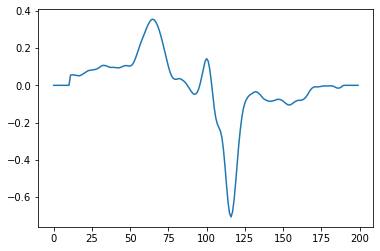

In [ ]:
plt.plot(patient_07_ecg[37])

In [ ]:
data_chf7=pd.DataFrame(patient_07_ecg)
data_chf7.to_csv('data_chf07.csv')
data_chf7.shape

(508, 200)

dataset of patient 08

In [ ]:
record8= wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf08',sampfrom=0,sampto=80000)
ann5 = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf08', 'ecg',sampfrom=0,sampto=80000)
data_all=record8.p_signal
data_all=data_all[:,[0]]
data_final=data_all.flatten()
# Extract R-peaks locations
signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_08(k):
  patient_08=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_08[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_08[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_08[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_08

In [ ]:
patient_08_ecg=[]
for k in range(1,length-1):
  patient_08_ecg.append(get_ecg_08(k))

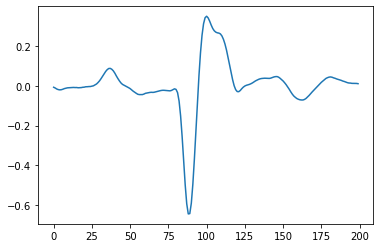

In [ ]:
plt.plot(patient_08_ecg[54])

In [ ]:
data_chf8=pd.DataFrame(patient_08_ecg)
data_chf8.to_csv('data_chf08.csv')
data_chf8.shape

(360, 200)

Dataset of patient 09

In [ ]:
record9= wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf09',sampfrom=0,sampto=90000)
ann5 = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf09', 'ecg',sampfrom=0,sampto=90000)
data_all=record9.p_signal
data_all=data_all[:,[0]]
data_final=data_all.flatten()
# Extract R-peaks locations
signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_09(k):
  patient_09=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_09[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_09[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_09[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_09

In [ ]:
patient_09_ecg=[]
for k in range(1,length-1):
  patient_09_ecg.append(get_ecg_09(k))

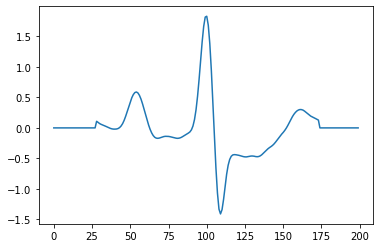

In [ ]:
plt.plot(patient_09_ecg[54])

In [ ]:
data_chf9=pd.DataFrame(patient_09_ecg)
data_chf9.to_csv('data_chf09.csv')
data_chf9.shape

(613, 200)

dataset of patient 10

In [ ]:
record10= wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf10',sampfrom=0,sampto=90000)
ann10 = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf10', 'ecg',sampfrom=0,sampto=90000)
data_all=record10.p_signal
data_all=data_all[:,[0]]
data_final=data_all.flatten()
# Extract R-peaks locations
signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_10(k):
  patient_10=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_10[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_10[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_10[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_10

In [ ]:
patient_10_ecg=[]
for k in range(1,length-1):
  patient_10_ecg.append(get_ecg_10(k))

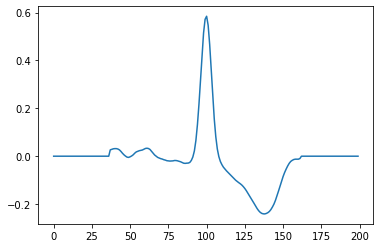

In [ ]:
plt.plot(patient_10_ecg[26])

In [ ]:
data_chf10=pd.DataFrame(patient_10_ecg)
data_chf10.to_csv('data_chf010.csv')
data_chf10.shape

(726, 200)

dataset of patient 11

In [ ]:
record11= wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf11',sampfrom=0,sampto=90000)
ann11 = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf11', 'ecg',sampfrom=0,sampto=90000)
data_all=record11.p_signal
data_all=data_all[:,[0]]
data_final=data_all.flatten()
# Extract R-peaks locations
signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_11(k):
  patient_11=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_11[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_11[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_11[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_11

In [ ]:
patient_11_ecg=[]
for k in range(1,length-1):
  patient_11_ecg.append(get_ecg_11(k))

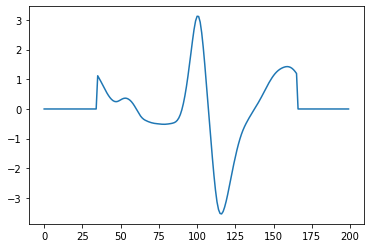

In [ ]:
plt.plot(patient_11_ecg[76])

In [ ]:
data_chf11=pd.DataFrame(patient_11_ecg)
data_chf11.to_csv('data_chf011.csv')
data_chf11.shape

(691, 200)

dataset of patient 12

In [ ]:
record12= wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf12',sampfrom=0,sampto=90000)
ann12 = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf12', 'ecg',sampfrom=0,sampto=90000)
data_all=record12.p_signal
data_all=data_all[:,[0]]
data_final=data_all.flatten()
# Extract R-peaks locations
signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_12(k):
  patient_12=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_12[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_12[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_12[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_12

In [ ]:
patient_12_ecg=[]
for k in range(1,length-1):
  patient_12_ecg.append(get_ecg_12(k))

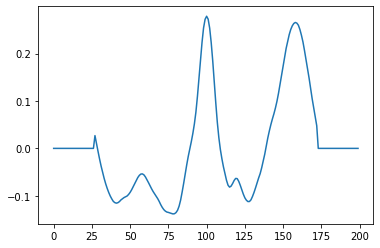

In [ ]:
plt.plot(patient_12_ecg[105])

In [ ]:
data_chf12=pd.DataFrame(patient_12_ecg)
data_chf12.to_csv('data_chf012.csv')
data_chf12.shape

(608, 200)

dataset of patient 13

In [ ]:
record13= wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf13',sampfrom=0,sampto=80000)
ann13 = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf13', 'ecg',sampfrom=0,sampto=80000)
data_all=record13.p_signal
data_all=data_all[:,[0]]
data_final=data_all.flatten()
# Extract R-peaks locations
signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_13(k):
  patient_13=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_13[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_13[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_13[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_13

In [ ]:
patient_13_ecg=[]
for k in range(1,length-1):
  patient_13_ecg.append(get_ecg_13(k))

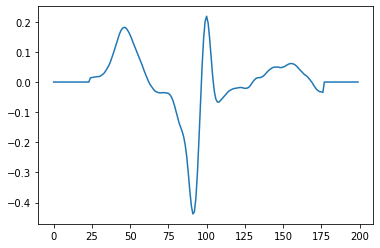

In [ ]:
plt.plot(patient_13_ecg[105])

In [ ]:
data_chf13=pd.DataFrame(patient_13_ecg)
data_chf13.to_csv('data_chf013.csv')
data_chf13.shape

(525, 200)

dataset of patient 14

In [ ]:
record14= wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf14',sampfrom=0,sampto=90000)
ann14= wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf14', 'ecg',sampfrom=0,sampto=90000)
data_all=record14.p_signal
data_all=data_all[:,[0]]
data_final=data_all.flatten()
# Extract R-peaks locations
signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_14(k):
  patient_14=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_14[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_14[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_14[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_14

In [ ]:
patient_14_ecg=[]
for k in range(1,length-1):
  patient_14_ecg.append(get_ecg_14(k))

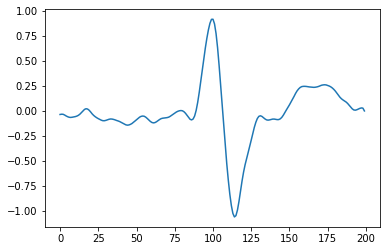

In [ ]:
plt.plot(patient_14_ecg[109])

In [ ]:
data_chf14=pd.DataFrame(patient_14_ecg)
data_chf14.to_csv('data_chf014.csv')
data_chf14.shape

(459, 200)

dataset of patient 15

In [ ]:
record15= wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf15',sampfrom=0,sampto=122637)
ann15 = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf15', 'ecg',sampfrom=0,sampto=122637)
data_all=record15.p_signal
data_all=data_all[:,[0]]
data_final=data_all.flatten()
# Extract R-peaks locations
signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
length=len(rpeaks_final)
def get_ecg_15(k):
  patient_15=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_15[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_15[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_15[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_15

In [ ]:
patient_15_ecg=[]
for k in range(1,length-1):
  patient_15_ecg.append(get_ecg_15(k))

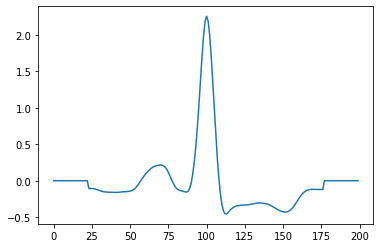

In [ ]:
plt.plot(patient_15_ecg[637])

In [ ]:
data_chf15=pd.DataFrame(patient_15_ecg)
data_chf15.to_csv('data_chf015.csv')
data_chf15.shape

(764, 200)

concationg all patient's dataset in a single file

In [ ]:
files=natsorted(glob.glob('data_*'))

In [ ]:
files

['data_chf01.csv',
 'data_chf02.csv',
 'data_chf03.csv',
 'data_chf04.csv',
 'data_chf05.csv',
 'data_chf06.csv',
 'data_chf07.csv',
 'data_chf08.csv',
 'data_chf09.csv',
 'data_chf010.csv',
 'data_chf011.csv',
 'data_chf012.csv',
 'data_chf013.csv',
 'data_chf014.csv',
 'data_chf015.csv']

In [ ]:
data_final=pd.concat((pd.read_csv(file) for file in files), ignore_index=True)
data_final.shape

(8429, 201)

In [ ]:
data_final.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '190', '191', '192', '193', '194', '195', '196', '197', '198', '199'],
      dtype='object', length=201)

In [ ]:
data_final.drop('Unnamed: 0',inplace = True, axis = 1)

In [ ]:
data_final=pd.DataFrame(data_final)
data_final.columns=['c' + str(i) for i in range(200)]
#data_final.index=["beat" + str(i) for i in range(6940)]
data_final.to_csv('data_BIDMC_final.csv')
data_final.shape

(8429, 200)

In [ ]:
data_=data_final.iloc[6337,:]

In [ ]:
print(data_)

c0      0.0
c1      0.0
c2      0.0
c3      0.0
c4      0.0
       ... 
c195    0.0
c196    0.0
c197    0.0
c198    0.0
c199    0.0
Name: 6337, Length: 200, dtype: float64


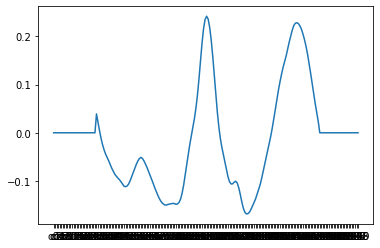

In [ ]:
plt.plot(data_)

Other useful Functions and process

Data detection/collection of All 15 Patients

In [ ]:
list1 = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15']
for i in list1:
  sig, fields = wfdb.rdsamp("/content/physionet.org/files/chfdb/1.0.0/chf{}".format(i),sampfrom=0,sampto=80000)
  ann = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf{}'.format(i), 'ecg',sampfrom=0,sampto=80000)
  #data_all=sig.p_signal
  data_all=sig[:,[0]]
  data_final=data_all.flatten()
  # Extract R-peaks locations
  signals, info = nk.ecg_process(data_final, sampling_rate=250)
  _, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
  rpeaks_final = info["ECG_R_Peaks"]
  cleaned_ecg_final= signals["ECG_Clean"]
  length=len(rpeaks_final)
  result_final=[]
  for k in range(length-1):
    if(k==0):
      m=rpeaks_final[0]
      n=rpeaks_final[1]
      mid_point=(m+n)//2
      #plt.plot(cleaned_ecg_final[(0+i)//2:mid_point])
      #print(cleaned_ecg1[(0+i)//2:mid_point].values)
      result_final.append(cleaned_ecg_final[(0+m)//2:mid_point].values)
    else:
      m=rpeaks_final[k-1]
      n=rpeaks_final[k]
      p=rpeaks_final[k+1]
      mid_point=(m+n)//2
      mid_point1=(n+p)//2
      #plt.plot(cleaned_ecg_final[mid_point:mid_point1])
      #print(cleaned_ecg_final[mid_point:mid_point1].values)
      result_final.append(cleaned_ecg_final[mid_point:mid_point1].values)
  
  # Extracting a beat every 5s?
#   # Filter for normal beats?
#   np.savetxt("CHF{}_sig.csv".format(i), new_sig, delimiter=",")
#   np.savetxt("CHF{}_ann.csv".format(i), new_sig, delimiter=",")
#   print("Processing signal of " + str(i) + " / " + str(len(list1)) + "...")

Using xqrs detection algorithm and compare against reference annotations of chf Patient 01

In [ ]:
# Use xqrs detection algorithm and compare against reference annotations
sig, fields = wfdb.rdsamp('/content/physionet.org/files/chfdb/1.0.0/chf01', channels=[0], sampto=1500)
ann_ref = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf01','ecg', sampto=1500)

# Run qrs detection on signal
xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()
# Alternatively, use the gateway function to get the qrs indices directly
# qrs_inds = processing.xqrs_detect(sig=sig[:,0], fs=fields['fs'])

# Compare detected qrs complexes to reference annotation.
# Note, first sample in 100.atr is not a qrs.
comparitor = processing.compare_annotations(ref_sample=ann_ref.sample[1:],
                                            test_sample=xqrs.qrs_inds,
                                            window_width=int(0.1 * fields['fs']),
                                            signal=sig[:,0])

# Print and plot the results
comparitor.print_summary()
comparitor.plot(title='xqrs detected qrs vs reference annotations')


Peak detection using "DWT" Method in Neurokit of ecg record of Patient 01

In [ ]:
record_01 = wfdb.rdrecord('/content/physionet.org/files/chfdb/1.0.0/chf01',channels=[0],sampfrom=0,sampto=1500)
ann_01 = wfdb.rdann('/content/physionet.org/files/chfdb/1.0.0/chf01', 'ecg',sampfrom=0,sampto=1500)
wfdb.plot_wfdb(record_01, ann_01)

data_01=record_01.p_signal
data_01=data_01[:,[0]]
data_chf1=data_01.flatten()

# Extract R-peaks locations
signals, info = nk.ecg_process(data_chf1, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_chf1, sampling_rate=250)

#rpeaks = info["ECG_R_Peaks"]
#cleaned_ecg_1= signals["ECG_Clean"]

# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(cleaned_ecg, rpeaks, sampling_rate=250, method="peak")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],                
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], cleaned_ecg)
print(waves_peak)

In [ ]:
# Visualize R-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(cleaned_ecg, rpeaks,
                                         sampling_rate=250, method="dwt", 
                                         show=True, show_type='bounds_R')

In [ ]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
#cleaned_ecg=cleaned_ecg.copy
_, waves_peak = nk.ecg_delineate(cleaned_ecg, rpeaks, sampling_rate=250, 
                                 method="peak", show=True, show_type='peaks')

In [ ]:
# Delineate the ECG signal
signal_dwt, waves_dwt = nk.ecg_delineate(cleaned_ecg, rpeaks, sampling_rate=250, 
                                         method="dwt", show=True, show_type='all')

In [ ]:
# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(cleaned_ecg, rpeaks, 
                                         sampling_rate=250, method="dwt", 
                                         show=True, show_type='peaks')